In [55]:

import pandas as pd

# Load dataset
data = pd.read_csv("healthcare_data.csv")
print("Dataset Preview:\n", data.head())


Dataset Preview:
    Patient_ID          Name          Diagnosis  Age Gender   Medication  \
0         101      John Doe            diabtss   45      M    metformin   
1         102    Jane Smith        Hyprtension   56      F   amlodipine   
2         103  Alex Johnson  Coronry Artery Ds   65      M      aspirin   
3         104           NaN                Flu   23      M  oseltamivir   
4         105    Lisa White  Coronry Artery Ds   -1      F          NaN   

   Visit_Date  
0  01-10-2023  
1  15-11-2023  
2         NaN  
3  01-12-2023  
4  10-12-2023  


In [56]:
# Replace invalid values in 'Age' and fill missing 'Name' and 'Medication'
import pandas as pd

# Disable the FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# Replace invalid values in 'Age' and fill missing 'Name' and 'Medication'
data['Age'] = data['Age'].replace(-1, None).fillna(data['Age'].median())
data['Name'] = data['Name'].fillna('Unknown')
data['Medication'] = data['Medication'].fillna('Unknown')

# Ensure 'Visit_Date' missing values are explicitly replaced with 'NULL'
data['Visit_Date'] = data['Visit_Date'].fillna('NULL')

# Display the cleaned data
print("After Handling Missing Values:\n", data)

After Handling Missing Values:
    Patient_ID          Name          Diagnosis   Age Gender   Medication  \
0         101      John Doe            diabtss    45      M    metformin   
1         102    Jane Smith        Hyprtension    56      F   amlodipine   
2         103  Alex Johnson  Coronry Artery Ds    65      M      aspirin   
3         104       Unknown                Flu    23      M  oseltamivir   
4         105    Lisa White  Coronry Artery Ds  34.0      F      Unknown   
5         105    Lisa White  Coronry Artery Ds  34.0      F      Unknown   

   Visit_Date  
0  01-10-2023  
1  15-11-2023  
2        NULL  
3  01-12-2023  
4  10-12-2023  
5  10-12-2023  


In [57]:
# Drop duplicate records
data = data.drop_duplicates()
print("After Removing Duplicates:\n", data)



After Removing Duplicates:
    Patient_ID          Name          Diagnosis   Age Gender   Medication  \
0         101      John Doe            diabtss    45      M    metformin   
1         102    Jane Smith        Hyprtension    56      F   amlodipine   
2         103  Alex Johnson  Coronry Artery Ds    65      M      aspirin   
3         104       Unknown                Flu    23      M  oseltamivir   
4         105    Lisa White  Coronry Artery Ds  34.0      F      Unknown   

   Visit_Date  
0  01-10-2023  
1  15-11-2023  
2        NULL  
3  01-12-2023  
4  10-12-2023  


In [58]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Predefined mapping for diagnosis normalization
diagnosis_mapping = {
    "diabtss": "Diabetes",
    "Hyprtension": "Hypertension",
    "Coronry Artery Ds": "Coronary Artery Disease",
    "Flu": "Influenza"
}

# Normalize Diagnosis
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: diagnosis_mapping.get(x, x))
print("After Normalizing Diagnoses:\n", data)


After Normalizing Diagnoses:
    Patient_ID          Name                Diagnosis   Age Gender  \
0         101      John Doe                 Diabetes    45      M   
1         102    Jane Smith             Hypertension    56      F   
2         103  Alex Johnson  Coronary Artery Disease    65      M   
3         104       Unknown                Influenza    23      M   
4         105    Lisa White  Coronary Artery Disease  34.0      F   

    Medication  Visit_Date  
0    metformin  01-10-2023  
1   amlodipine  15-11-2023  
2      aspirin        NULL  
3  oseltamivir  01-12-2023  
4      Unknown  10-12-2023  


In [59]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 544.7 kB/s eta 0:00:24
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 2.2 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 2.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 3.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3.9 MB/s eta 0

In [60]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")


In [61]:
import spacy
print(spacy.info())


{'spacy_version': '3.8.3', 'location': 'C:\\Users\\Nitin\\anaconda3\\Lib\\site-packages\\spacy', 'platform': 'Windows-11-10.0.22631-SP0', 'python_version': '3.12.4', 'pipelines': {}}


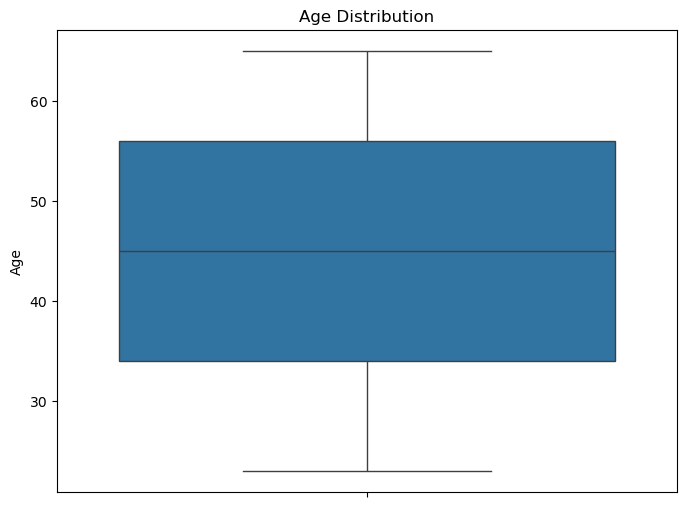

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['Age'])
plt.title("Age Distribution")
plt.show()


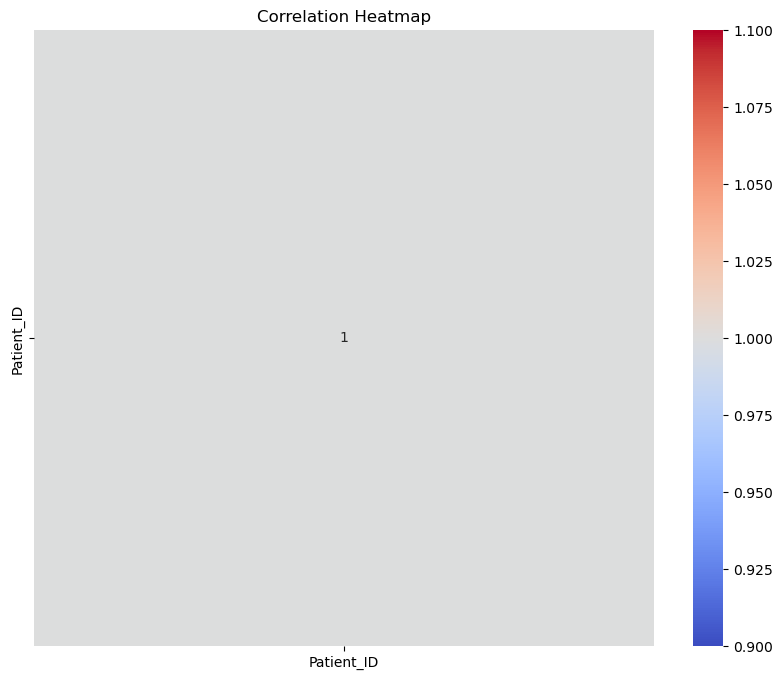

In [63]:

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you're using only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Optional: Handle missing values
numeric_data = numeric_data.fillna(numeric_data.median())

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [64]:
# Save cleaned dataset to CSV
data.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_healthcare_data.csv'")


Cleaned dataset saved as 'cleaned_healthcare_data.csv'
